# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes representing class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

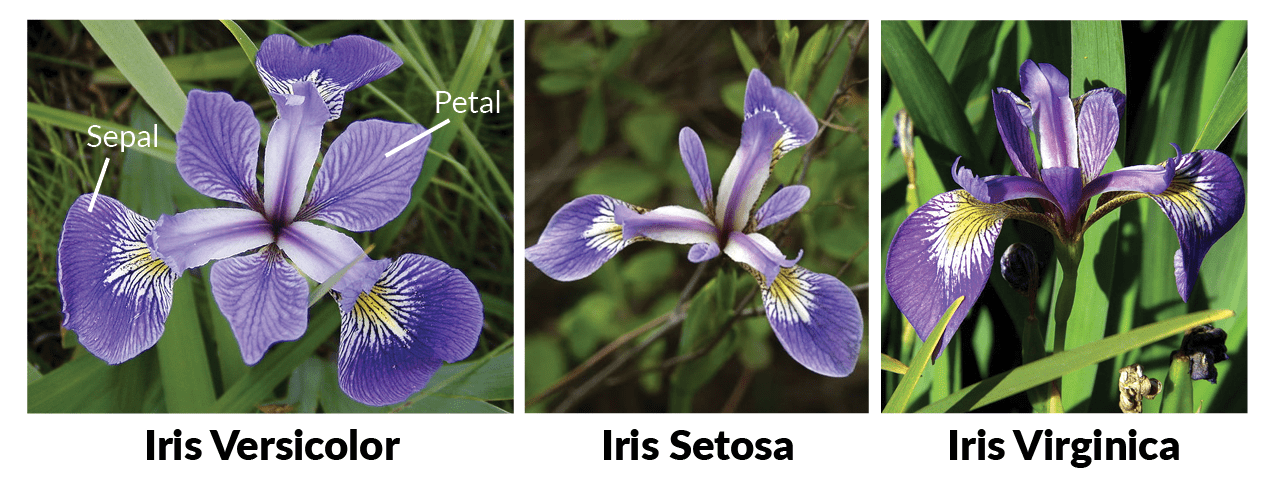


# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Iris.csv')

# STEP #2: EXPLORING THE DATASET  

In [2]:
# Let's view the head of the training dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's view the last elements in the training dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


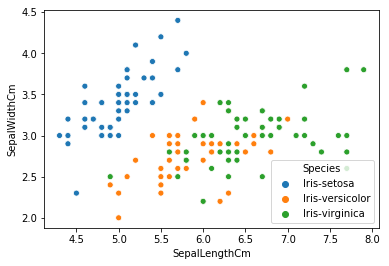

In [4]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')

Iris-Setosa lies far from the other 2 classes. This breed has higher sepal width and lower sepal length.

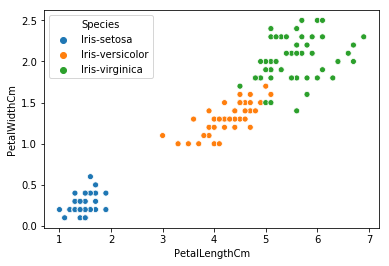

In [5]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')

Again, Iris-Setosa seems easy to seperate and lies far from the other 2 breeds.

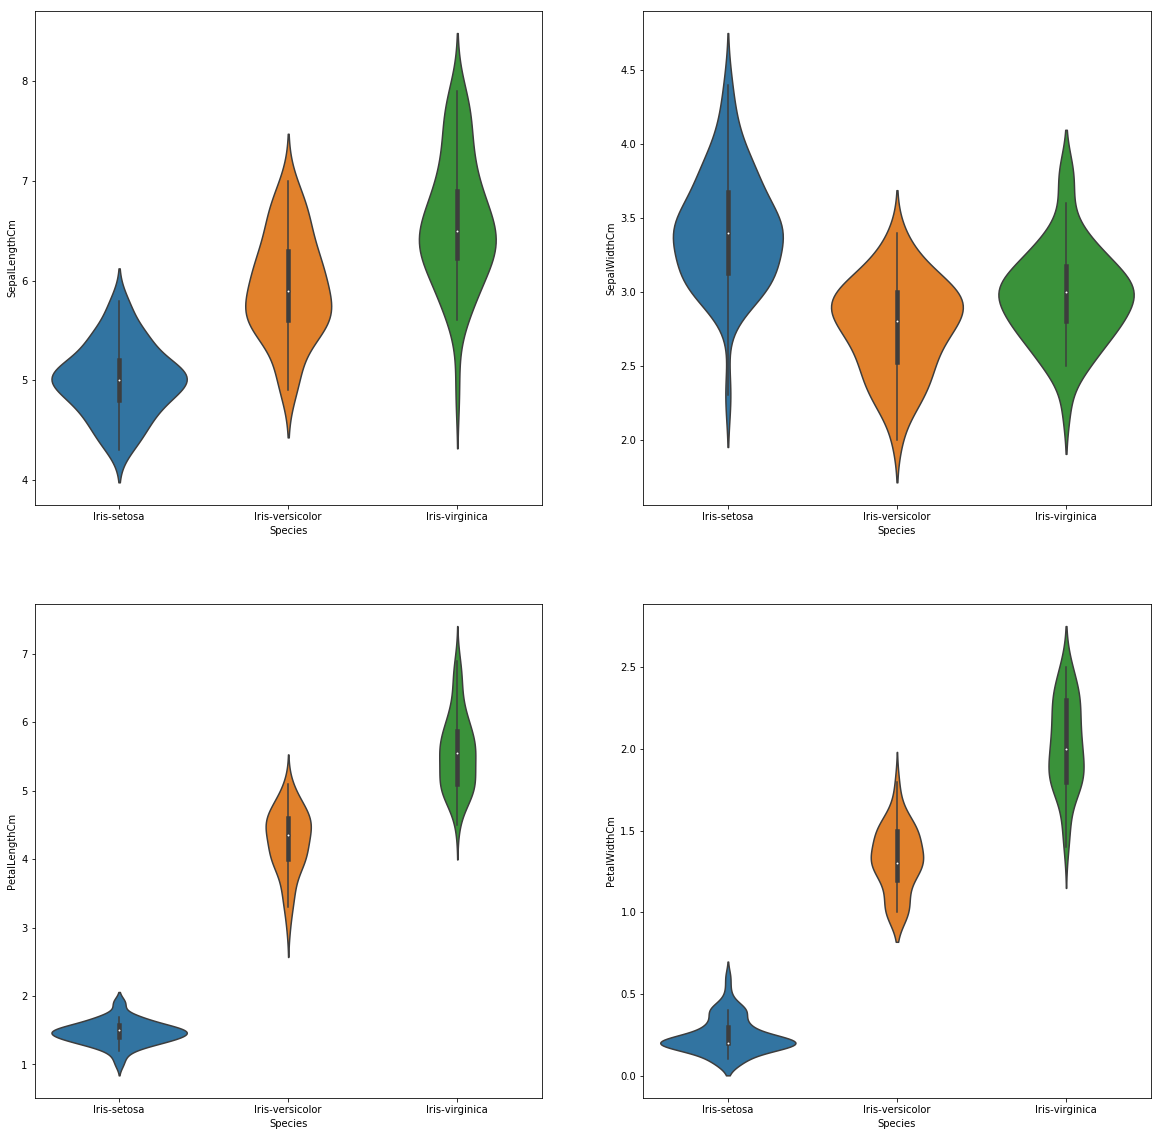

In [6]:
# Let's show the Violin plot 
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.violinplot(y='SepalLengthCm', x='Species', data=df)
plt.subplot(222)
sns.violinplot(y='SepalWidthCm', x='Species', data=df)
plt.subplot(223)
sns.violinplot(y='PetalLengthCm', x='Species', data=df)
plt.subplot(224)
sns.violinplot(y='PetalWidthCm', x='Species', data=df)

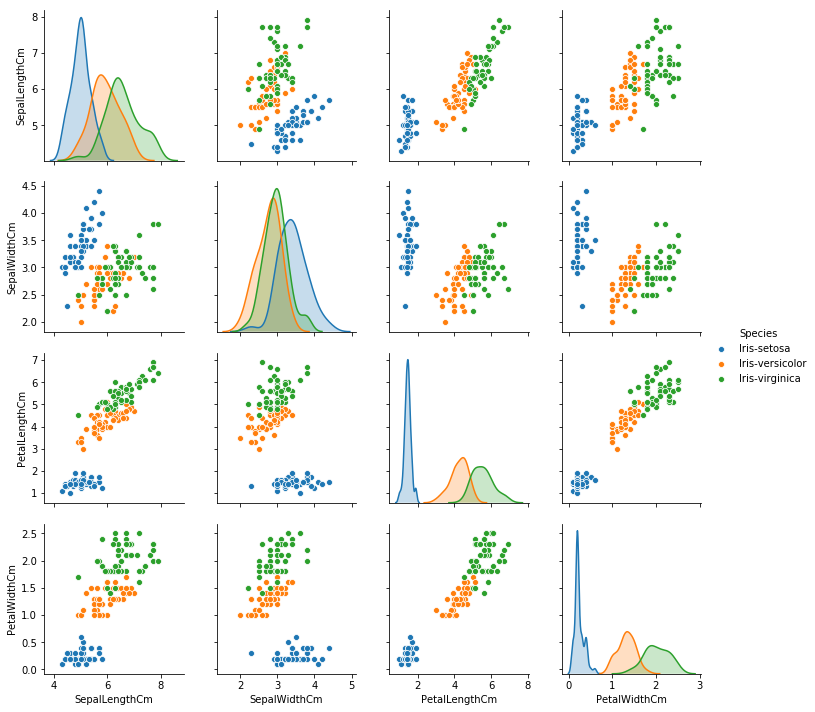

In [7]:
# Let's try the Seaborn pairplot
sns.pairplot(df, hue='Species')

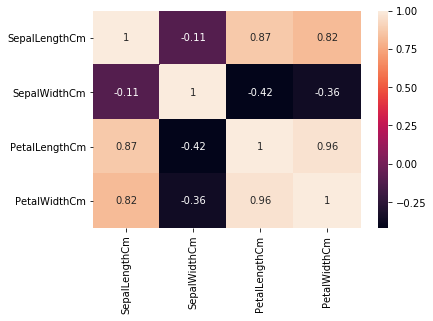

In [8]:
# Let's check the correlation between the variables 
sns.heatmap(df.corr(), annot=True)

# STEP #3: DATA CLEANING

In [31]:
# Let's drop the ID and Species (target label) coloumns
X = df.iloc[:,:4]

In [32]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y = df.iloc[:,4]

In [34]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [35]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [36]:
X_train.shape

(97, 4)

In [37]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
51,6.4,3.2,4.5,1.5
82,5.8,2.7,3.9,1.2
15,5.7,4.4,1.5,0.4
118,7.7,2.6,6.9,2.3
77,6.7,3.0,5.0,1.7


In [38]:
y_train

51     Iris-versicolor
82     Iris-versicolor
15         Iris-setosa
118     Iris-virginica
77     Iris-versicolor
            ...       
100     Iris-virginica
133     Iris-virginica
125     Iris-virginica
120     Iris-virginica
80     Iris-versicolor
Name: Species, Length: 97, dtype: object

# STEP #4: TRAINING THE MODEL

In [54]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2) #metric='minkowski', p=2 means we are using
                                                                            #euclidean distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# STEP #5: EVALUATING THE MODEL

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor

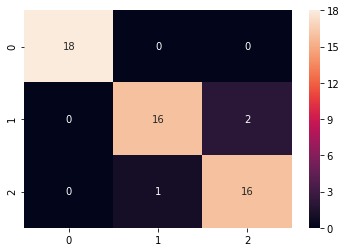

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [58]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.89      0.94      0.91        17

      micro avg       0.94      0.94      0.94        53
      macro avg       0.94      0.94      0.94        53
   weighted avg       0.94      0.94      0.94        53

